In [5]:
# Cell 1: Load the data
import pandas as pd

# Assuming the data directory is correctly placed in relation to the notebook
news_data = pd.read_csv('../data/data.csv')

# This line ensures that the data is loaded. If there's an error after this, it's likely due to the file path.
print("Data loaded successfully. Number of rows in the dataset:", len(news_data))


Data loaded successfully. Number of rows in the dataset: 58356


In [11]:
# Cell 2: Check for missing values
missing_values = news_data.isnull().sum()
print(missing_values)


article_id             0
source_id          40585
source_name            0
author              2163
title                  0
description           10
url                    0
url_to_image        3451
published_at           0
content                0
category              21
article                0
title_sentiment        0
dtype: int64


In [13]:
# Calculate summary statistics for numerical columns
summary_statistics = news_data.describe()
print(summary_statistics)


          article_id
count   58356.000000
mean   298958.734492
std    216023.477569
min       418.000000
25%    121776.500000
50%    251651.000000
75%    451541.500000
max    781308.000000


In [14]:
# Print unique values for 'source_name'
print("Unique Source Names:", news_data['source_name'].unique())

# Print unique values for 'title_sentiment'
print("Unique Title Sentiments:", news_data['title_sentiment'].unique())


Unique Source Names: ['Forbes' 'CNA' 'Time' 'Phys.Org' 'Digital Trends' 'Al Jazeera English'
 'BBC News' 'Deadline' 'Euronews' 'RT' 'The Punch'
 'International Business Times' 'The Indian Express' 'ETF Daily News'
 'ABC News' 'Globalsecurity.org' 'Marketscreener.com' 'The Times of India'
 'GlobeNewswire' 'CNN' 'Business Insider' 'Gizmodo.com' 'Wired'
 'The Verge' 'NPR' 'Boing Boing' 'Android Central' 'ReadWrite'
 'AllAfrica - Top Africa News']
Unique Title Sentiments: ['Neutral' 'Positive' 'Negative']


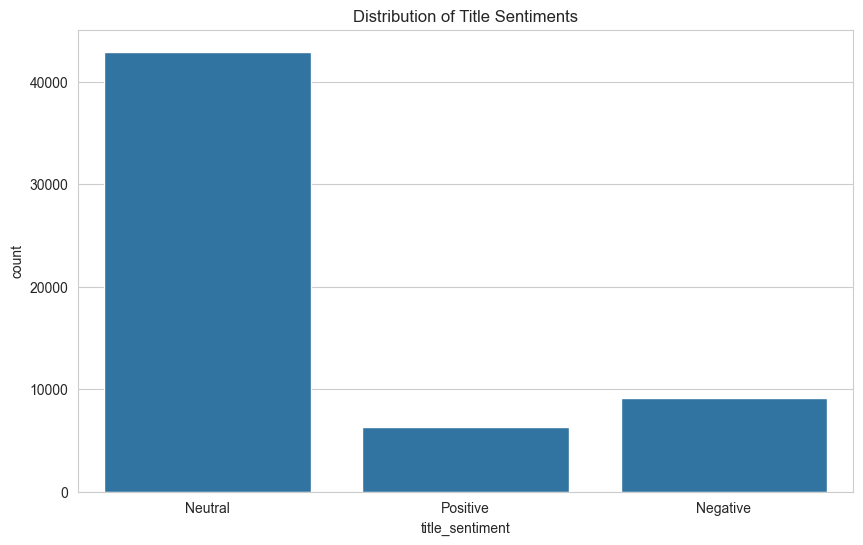

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Plot the distribution of sentiments
plt.figure(figsize=(10, 6))
sns.countplot(data=news_data, x='title_sentiment')
plt.title('Distribution of Title Sentiments')
plt.show()


In [7]:
# Option to drop 'source_id' column
# news_data_cleaned = news_data.drop(columns=['source_id'])

# Fill missing 'author' names with 'Unknown'
news_data['author'].fillna('Unknown', inplace=True)


C:\Users\hp\AppData\Local\Temp\ipykernel_23344\3317379451.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  news_data['author'].fillna('Unknown', inplace=True)


In [ ]:
# For example, you could create a new feature for article length
news_data['article_length'] = news_data['article'].apply(len)
